# Pós Ciência dos Dados - Aplicações de Aprendizado de Máquina

## Atividade 1

Utilize as células a seguir como base para carregar as informações, e a partir da última célula desse modelo, desenvolva seu raciocínio e como seria a abordagem do seu grupo para esse problema. *Não altere as células apresentadas aqui para não danificar a leitura dos dados.*

Os dados estão mascarados, mas basicamente, a variável *y* aponta para quando uma determinada ação vai subir ou vai descer na bolsa.

---

**Nome dos integrantes**

---

Lembrem-se, o grupo deve ter no máximo 4 integrantes por grupo, e deverão ser entregues até **08/02 às 23h59** esse notebook preenchido com os experimentos realizados e as conclusões observadas, além de um PDF com 5 slides para o grupo apresentar em 3 minutos para o restante da sala.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model

# deixa fixo o fator de aleatoriedade
np.random.seed(0)

In [3]:
# carrega os dados
data = pd.read_csv('training_data.csv', header=0)

data = data.drop([
    'id', 'era', 'data_type', 'target_charles', 'target_elizabeth',
    'target_jordan', 'target_ken', 'target_frank', 'target_hillary'],axis=1)

In [4]:
# transforma o CSV em numpy
features = [f for f in list(data) if "feature" in f]
X = data[features].sample(5000)
y = data['target_bernie'].sample(5000)
#Returns a random sample of items from an axis of object.
    



In [5]:
# exibe quantidade de amostras e atributos
print(X.shape)
print(y.shape)

(5000, 50)
(5000,)


In [5]:
# a partir daqui é com você...
# 1) separe 30% dos dados para teste e utilize os outros 70% como achar melhor
# 2) lembre-se de aplicar os conceitos vistos em aula

In [ ]:
#linear

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False)
XL_train, XL_test, yL_train, yL_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [15]:
lr.fit(XL_train,yL_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_predL = lr.predict(XL_test)

In [18]:
# comparando com gabarito
from sklearn.metrics import accuracy_score
accuracy_score(yL_test, y_predL.round(),normalize=False)

735

In [30]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
import time

In [25]:
# Perform a standard scaler on the data
scaler = preprocessing.StandardScaler()
featureVectors = scaler.fit_transform(X)

# Encode labels to be acceptable
labelEncoder = preprocessing.LabelEncoder()
labels = labelEncoder.fit_transform(y)

featureVectorTrain, featureVectorTest, labelsTrain, labelsTest = model_selection.train_test_split(featureVectors, labels, test_size=0.3, random_state=42)

In [34]:
models = []
models.append(('SVM', svm.SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SGDRegressor', linear_model.SGDRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('BayesianRidge', linear_model.BayesianRidge())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('LassoLars', linear_model.LassoLars())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('ARDRegression', linear_model.ARDRegression())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('PassiveAggressiveRegressor', linear_model.PassiveAggressiveRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('TheilSenRegressor', linear_model.TheilSenRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('LinearRegression', linear_model.LinearRegression())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [35]:
scoring = 'accuracy'

# evaluate each model in turn
results = []
names = []
print("---------------------------------------")
for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, featureVectorTrain, labelsTrain, cv=kfold, scoring=scoring)
    elapsed_time = time.time() - start_time
    results.append(cv_results)
    names.append(name)
    msg = "{:3.2f} ({:3.2f})  Time elapsed: {:6.2f}".format(cv_results.mean(), cv_results.std(), elapsed_time)
    msg = "%s "%(name) + msg
    print(msg)
print("---------------------------------------")

print("Done")

---------------------------------------
SVM 0.49 (0.03)  Time elapsed:   9.77
LR 0.49 (0.03)  Time elapsed:   0.58
LDA 0.50 (0.02)  Time elapsed:   0.10
KNN 0.50 (0.02)  Time elapsed:   1.01
CART 0.49 (0.02)  Time elapsed:   2.37
NB 0.50 (0.03)  Time elapsed:   0.04
---------------------------------------
Done


Text(0.5,1,'PCA of Bolsa dataset')

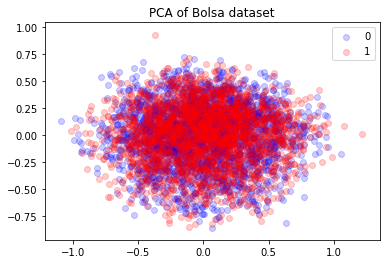

In [6]:
# PCA, esta facinho separar as coisas kkkk, usamos o X
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
ids=['0','1']
colors = ['blue', 'red']
for color, i, tgname in zip(colors, [0,1],ids):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.2, label=tgname)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Bolsa dataset')

Text(0.5,1,'PCA of Bolsa ESCALADO dataset')

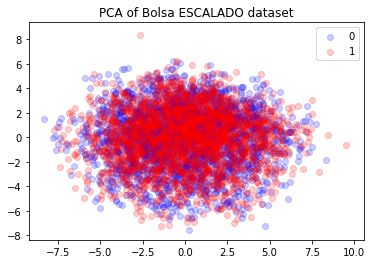

In [7]:
#PCA escalado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(X)
data_s = scaler.transform(X)

pca = PCA(n_components=2)
X_r = pca.fit_transform(data_s)
ids=['0','1']
colors = ['blue', 'red']
for color, i, tgname in zip(colors, [0,1],ids):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.2, label=tgname)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Bolsa ESCALADO dataset')


In [8]:
#knn simples
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [9]:
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
y_pred2 = knn2.predict(X_test2)

In [11]:
# comparando com gabarito
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)

0.518

In [12]:
#validação cruzada
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
# separa-se uma parcela para encontrar os melhores parâmetros (5% do original)
data_gs, data_cv, target_gs, target_cv = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# uma forma automática de StandardScaler + KNN
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [14]:
# utiliza-se GridSearchCV para achar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
parameters = {'clf__n_neighbors': [1,2,3,4,5],'clf__algorithm':['brute','ball_tree']} # quais parâmetros e quais valores serão testados
clf = GridSearchCV(pipeline, parameters, cv=3, iid=False) # clf vai armazenar qual foi a melhor configuração
clf.fit(data_gs,target_gs)
print(clf.best_estimator_)
# utilizando validação cruzada para avaliar o modelo
scores = cross_val_score(clf, data_cv, target_cv, cv=5)

print('Accuracy - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))])
Accuracy - 48.87 +- 2.08
